<a href="https://colab.research.google.com/github/JonathanSum/pytorch-Deep-Learning_colab/blob/master/Ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git
!git clone https://github.com/JonathanSum/JonathanSum.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 703 (delta 7), reused 2 (delta 1), pack-reused 686
Receiving objects: 100% (703/703), 185.80 MiB | 24.47 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking out files: 100% (228/228), done.
Cloning into 'JonathanSum'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 268 (delta 37), reused 0 (delta 0), pack-reused 178
Receiving objects: 100% (268/268), 27.96 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [2]:
from torchvision import datasets
data_path = '/content/dlwpt-code/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Extracting /content/dlwpt-code/p1ch7/cifar-10-python.tar.gz to /content/dlwpt-code/p1ch7
Files already downloaded and verified


In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

For some advanced uses, PyTorch also provides IterableDataset. This can be used in cases like datasets in
which random access to the data is prohibitively expensive or does not make sense: for example, because data
is generated on the fly.

In [5]:
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FD11B116D30>, 1)

In [6]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
for img, label in cifar10
if label in [0, 2]]
cifar2_val = [(img, label_map[label])
for img, label in cifar10_val
if label in [0, 2]]

In [7]:
import matplotlib.pyplot as plt

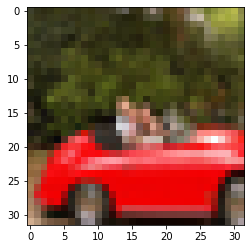

In [8]:
plt.imshow(img)
plt.show()

In [114]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [10]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [11]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())


In [12]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [13]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [14]:
img_t

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

In [15]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

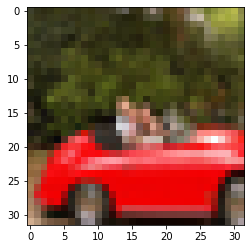

In [16]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [17]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [18]:
imgs.view(3, -1).shape

torch.Size([3, 51200000])

In [19]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [20]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [22]:
trans_am = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.4915, 0.4823, 0.4468),
                      (0.2470, 0.2435, 0.2616))])

In [23]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform = trans_am)

In [24]:
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform = trans_am)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


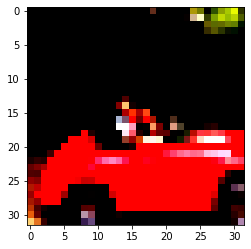

<class 'torch.Tensor'>


In [25]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()
print(type(img_t))

In [26]:
label_map = {0: 0, 2: 1}

In [27]:
class_names = ['airplane', 'bird']

In [28]:
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
          for img, label in cifar10_val
          if label in [0, 2]]

In [29]:
cifar2[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FD0CB07CEB8>, 1)

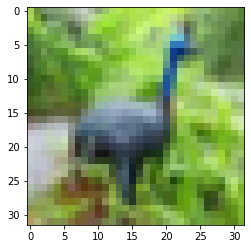

In [30]:
plt.imshow(cifar2[0][0])
plt.show()

In [31]:
import torch.nn as nn
n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,
                512
            ),
            nn.Tanh(),
            nn.Linear(
                512,
                n_out,
            )
          )

In [32]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [33]:
x = torch.tensor([1.0, 2.0, 3.0])

In [34]:
softmax(x).sum()

tensor(1.)

In [35]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

In [36]:
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [37]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.Softmax(dim=1))


In [38]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10
              if label in [0, 2]]

In [39]:
img, _ = cifar2[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


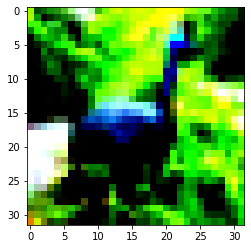

In [40]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [41]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [42]:
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): Softmax(dim=1)
)

In [43]:
model[0].weight.shape

torch.Size([512, 3072])

In [44]:
out = model(img_batch)
out

tensor([[0.4826, 0.5174]], grad_fn=<SoftmaxBackward>)

In [45]:
max_value, index = torch.max(out, dim=1)
print(max_value)
index

tensor([0.5174], grad_fn=<MaxBackward0>)


tensor([1])

In [46]:
# NLL = - sum(log(out_i[c_i])),

In [47]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.LogSoftmax(dim=1))

In [48]:
loss = nn.NLLLoss()

In [49]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(1.0922, grad_fn=<NllLossBackward>)

In [50]:
label

1

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [52]:
loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

    

KeyboardInterrupt: ignored

In [ ]:
from torchvision import datasets, transforms
data_path = '/content/dlwpt-code/p1ch7'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [104]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        
correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)


TypeError: ignored

In [ ]:
connected_model = nn.Sequential(
nn.Linear(3072, 1024),
nn.Tanh(),
nn.Linear(1024, 512),
nn.Tanh(),
nn.Linear(512, 128),
nn.Tanh(),
nn.Linear(128, 2))
loss_fn = nn.CrossEntropyLoss()

In [ ]:
numel_list = [p.numel()
        for p in connected_model.parameters()
        if p.requires_grad == True]
sum(numel_list), numel_list

In [ ]:
numel_list = [p.numel() for p in connected_model.parameters()]
sum(numel_list), numel_list

In [ ]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

7.4 Exercises<br>
1 Use torchvision to implement random cropping of the data.<br>
a How are the resulting images different from the uncropped <br>originals?<br>
If it is cropped, it is smaller and cropped.<br>
It will not be the same.<br>
The training will be more generalized.<br>
2 Switch loss functions (perhaps MSE).<br>
MSE doesn't work for batch here.


The provided shapes are for nn.CrossEntropyLoss and nn.MSELoss expects the tensors to have the same shape or broadcastable as explained in the first post.
If you want to use nn.MSELoss for a classification use case, you could probably create a one-hot encoded tensor via:

label_batch = F.one_hot(label_batch, num_classes=5)
https://discuss.pytorch.org/t/only-crossentropyloss-seems-to-work-mse-and-other-fail/76941/9

3 Yes.It will be worst for validation set. In below, we can see it is slightly worst than the bigger model.



In [87]:
import torchvision
t2 = torchvision.transforms.RandomCrop(7, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')
t1=transforms.Compose(
            [transforms.Resize(256),
             transforms.RandomCrop(224),
            #  transforms.RandomHorizontalFlip(),
             transforms.ToTensor(),
    # transforms.Normalize((0.4915, 0.4823, 0.4468),        #mean
    #                       (0.2470, 0.2435, 0.2616)),      #std
             ])

In [88]:
tensor_cifar10_crop = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=t1)


In [101]:
img_t, label = tensor_cifar10_crop[99]
img_t.shape, type(img_t), img_t.min(), img_t.max()

(torch.Size([3, 224, 224]), torch.Tensor, tensor(0.), tensor(1.))

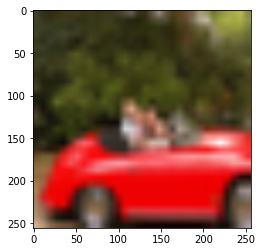

In [80]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

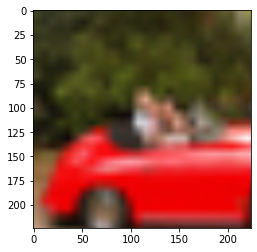

In [100]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

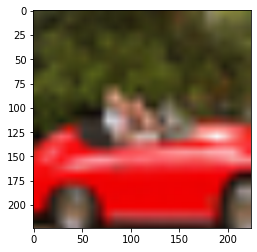

In [102]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [108]:
model = nn.Sequential(
nn.Linear(3072, 1024),
nn.Tanh(),
nn.Linear(1024, 512),
nn.Tanh(),
nn.Linear(512, 128),
nn.Tanh(),
nn.Linear(128, 2))


import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

# model = nn.Sequential(
#             nn.Linear(3072, 512),
#             nn.Tanh(),
#             nn.Linear(512, 2),
#             nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.451259
Epoch: 1, Loss: 0.375885
Epoch: 2, Loss: 0.474497
Epoch: 3, Loss: 0.278292
Epoch: 4, Loss: 0.636971
Epoch: 5, Loss: 0.334159
Epoch: 6, Loss: 0.333039
Epoch: 7, Loss: 0.443919
Epoch: 8, Loss: 0.377406
Epoch: 9, Loss: 0.613095
Epoch: 10, Loss: 0.283816
Epoch: 11, Loss: 0.629104
Epoch: 12, Loss: 0.441781
Epoch: 13, Loss: 0.469058
Epoch: 14, Loss: 0.458037
Epoch: 15, Loss: 0.370937
Epoch: 16, Loss: 0.413946
Epoch: 17, Loss: 0.582408
Epoch: 18, Loss: 0.221009
Epoch: 19, Loss: 0.568284
Epoch: 20, Loss: 0.409977
Epoch: 21, Loss: 0.306451
Epoch: 22, Loss: 0.173832
Epoch: 23, Loss: 0.182902
Epoch: 24, Loss: 0.510955
Epoch: 25, Loss: 0.320430
Epoch: 26, Loss: 0.366148
Epoch: 27, Loss: 0.310135
Epoch: 28, Loss: 0.602862
Epoch: 29, Loss: 0.451990
Epoch: 30, Loss: 0.156399
Epoch: 31, Loss: 0.173652
Epoch: 32, Loss: 0.110699
Epoch: 33, Loss: 0.351679
Epoch: 34, Loss: 0.095026
Epoch: 35, Loss: 0.073476
Epoch: 36, Loss: 0.096424
Epoch: 37, Loss: 0.159024
Epoch: 38, Loss: 0.095

In [109]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999900


In [121]:

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [128]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [123]:
t1 = transforms.ToTensor()
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.819000


In [126]:

from torchvision import datasets, transforms
data_path = '/content/dlwpt-code/p1ch7'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [134]:
next(train_loader)

TypeError: ignored

In [137]:
model = nn.Sequential(
nn.Linear(3072, 1024),
nn.Tanh(),
nn.Linear(1024, 2))


import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

# model = nn.Sequential(
#             nn.Linear(3072, 512),
#             nn.Tanh(),
#             nn.Linear(512, 2),
#             nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.508866
Epoch: 1, Loss: 0.435767
Epoch: 2, Loss: 0.399114
Epoch: 3, Loss: 0.504698
Epoch: 4, Loss: 0.281903
Epoch: 5, Loss: 0.528629
Epoch: 6, Loss: 0.344176
Epoch: 7, Loss: 0.337443
Epoch: 8, Loss: 0.472323
Epoch: 9, Loss: 0.346204
Epoch: 10, Loss: 0.201039
Epoch: 11, Loss: 0.429277
Epoch: 12, Loss: 0.542250
Epoch: 13, Loss: 0.227393
Epoch: 14, Loss: 0.251673
Epoch: 15, Loss: 0.270191
Epoch: 16, Loss: 0.289180
Epoch: 17, Loss: 0.222507
Epoch: 18, Loss: 0.306741
Epoch: 19, Loss: 0.418327
Epoch: 20, Loss: 0.340546
Epoch: 21, Loss: 0.267292
Epoch: 22, Loss: 0.256979
Epoch: 23, Loss: 0.474911
Epoch: 24, Loss: 0.189282
Epoch: 25, Loss: 0.466949
Epoch: 26, Loss: 0.171352
Epoch: 27, Loss: 0.154374
Epoch: 28, Loss: 0.242228
Epoch: 29, Loss: 0.137963
Epoch: 30, Loss: 0.097903
Epoch: 31, Loss: 0.158869
Epoch: 32, Loss: 0.295100
Epoch: 33, Loss: 0.118574
Epoch: 34, Loss: 0.332272
Epoch: 35, Loss: 0.224092
Epoch: 36, Loss: 0.159103
Epoch: 37, Loss: 0.111296
Epoch: 38, Loss: 0.155

In [138]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999300


In [139]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.817000
